In [ ]:
#Обзор

#Данные были разделены на две группы:

#обучающий набор (train.csv)
#тестовый набор (test.csv)
#Обучающее множество должно использоваться для построения моделей машинного обучения. Для обучающего набора мы предоставляем результаты (также известные как "базовая истина") для каждого пассажира. Ваша модель будет основана на "признаках", таких как пол и класс пассажиров. Вы также можете использовать инженерию признаков для создания новых признаков.

#Тестовый набор используется для того, чтобы увидеть, насколько хорошо ваша модель работает на невидимых данных. Для тестового набора мы не предоставляем исходные данные по каждому пассажиру. Ваша задача - предсказать эти результаты. Для каждого пассажира из тестового набора используйте модель, которую вы обучили, чтобы предсказать, выжил ли он после затопления "Титаника".

#Словарь данных

#Переменная  Определение   Ключ
#Выживание  Выживание 0 = нет, 1 = да
#pclass    Класс билета 1 = 1-й, 2 = 2-й, 3 = 3-й
#пол Пол	
#Возраст Возраст в годах	
#sibsp # братья и сестры / супруги на борту "Титаника	
#parch # родителей / детей на борту "Титаника	
#билет Номер билета	
#тариф Пассажирский тариф	
#каюта Номер каюты	
#Порт посадки C = Шербур, Q = Квинстаун, S = Саутгемптон
#Примечания к переменным

#pclass: Показатель социально-экономического статуса (SES)
#1-й = Верхний
#2-й = Средний
#3-й = Нижний

#возраст: Возраст дробный, если меньше 1. Если возраст оценочный, то в виде xx.5.

#sibsp: Набор данных определяет семейные отношения таким образом...
#Sibling = брат, сестра, сводный брат, сводная сестра.
#Супруг = муж, жена (любовницы и невесты игнорируются)

#parch: Набор данных определяет семейные отношения таким образом...
#Родитель = мать, отец
#Ребенок = дочь, сын, падчерица, пасынок.
#Некоторые дети путешествовали только с няней, поэтому parch=0 для них.

=================== Подготовка ===================

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.impute import SimpleImputer

In [2]:
from google.colab import drive
drive.mount ('/content/drive',force_remount=True)

Mounted at /content/drive


In [3]:
Titanic_Data = pd.read_csv("/content/drive/My Drive/titanic3.csv",sep=';', nrows=1000)
Titanic_Data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,"211,3375",B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,"0,9167",1,2,113781,"151,5500",C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,"151,5500",C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
imp = SimpleImputer(missing_values = np.NaN, strategy = "most_frequent")

Titanic_Data = pd.DataFrame(imp.fit_transform(Titanic_Data), columns=Titanic_Data.columns).astype(Titanic_Data.dtypes.to_dict())

Titanic_Data.columns = Titanic_Data.columns
Titanic_Data.index   = Titanic_Data.index

Titanic_Data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,"211,3375",B5,S,2,9.0,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,"0,9167",1,2,113781,"151,5500",C22 C26,S,11,9.0,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,"151,5500",C22 C26,S,4,9.0,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,"151,5500",C22 C26,S,4,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,"151,5500",C22 C26,S,4,9.0,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,0,"Markoff, Mr. Marin",male,35,0,0,349213,"7,8958",C23 C25 C27,C,4,9.0,"New York, NY"
996,3,0,"Markun, Mr. Johann",male,33,0,0,349257,"7,8958",C23 C25 C27,S,4,9.0,"New York, NY"
997,3,1,"Masselmani, Mrs. Fatima",female,24,0,0,2649,"7,2250",C23 C25 C27,C,C,9.0,"New York, NY"
998,3,0,"Matinoff, Mr. Nicola",male,24,0,0,349255,"7,8958",C23 C25 C27,C,4,9.0,"New York, NY"


In [5]:
Titanic_Data.age = [x.replace(',', '.') for x in Titanic_Data.age]
Titanic_Data.age = Titanic_Data.age.astype(float)

In [6]:
Titanic_Data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,"211,3375",B5,S,2,9.0,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,"151,5500",C22 C26,S,11,9.0,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,"151,5500",C22 C26,S,4,9.0,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,"151,5500",C22 C26,S,4,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,"151,5500",C22 C26,S,4,9.0,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,0,"Markoff, Mr. Marin",male,35.0000,0,0,349213,"7,8958",C23 C25 C27,C,4,9.0,"New York, NY"
996,3,0,"Markun, Mr. Johann",male,33.0000,0,0,349257,"7,8958",C23 C25 C27,S,4,9.0,"New York, NY"
997,3,1,"Masselmani, Mrs. Fatima",female,24.0000,0,0,2649,"7,2250",C23 C25 C27,C,C,9.0,"New York, NY"
998,3,0,"Matinoff, Mr. Nicola",male,24.0000,0,0,349255,"7,8958",C23 C25 C27,C,4,9.0,"New York, NY"


=================== Удаление дубликатов ===================

In [7]:
Titanic_Data = Titanic_Data.drop_duplicates(keep = False)
Titanic_Data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,"211,3375",B5,S,2,9.0,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,"151,5500",C22 C26,S,11,9.0,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,"151,5500",C22 C26,S,4,9.0,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,"151,5500",C22 C26,S,4,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,"151,5500",C22 C26,S,4,9.0,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,0,"Markoff, Mr. Marin",male,35.0000,0,0,349213,"7,8958",C23 C25 C27,C,4,9.0,"New York, NY"
996,3,0,"Markun, Mr. Johann",male,33.0000,0,0,349257,"7,8958",C23 C25 C27,S,4,9.0,"New York, NY"
997,3,1,"Masselmani, Mrs. Fatima",female,24.0000,0,0,2649,"7,2250",C23 C25 C27,C,C,9.0,"New York, NY"
998,3,0,"Matinoff, Mr. Nicola",male,24.0000,0,0,349255,"7,8958",C23 C25 C27,C,4,9.0,"New York, NY"


=================== Гистограмма класса survived ===================

(array([577.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 423.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

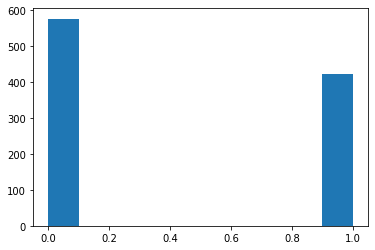

In [8]:
plt.hist(Titanic_Data.survived)

=================== Нормализация ===================

In [9]:
le = preprocessing.LabelEncoder()
Genders = Titanic_Data.sex.to_frame()
Genders = Genders.apply(le.fit_transform)
Titanic_Data.sex = Genders
Titanic_Data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,24160,"211,3375",B5,S,2,9.0,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,113781,"151,5500",C22 C26,S,11,9.0,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",0,2.0000,1,2,113781,"151,5500",C22 C26,S,4,9.0,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,113781,"151,5500",C22 C26,S,4,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,2,113781,"151,5500",C22 C26,S,4,9.0,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,0,"Markoff, Mr. Marin",1,35.0000,0,0,349213,"7,8958",C23 C25 C27,C,4,9.0,"New York, NY"
996,3,0,"Markun, Mr. Johann",1,33.0000,0,0,349257,"7,8958",C23 C25 C27,S,4,9.0,"New York, NY"
997,3,1,"Masselmani, Mrs. Fatima",0,24.0000,0,0,2649,"7,2250",C23 C25 C27,C,C,9.0,"New York, NY"
998,3,0,"Matinoff, Mr. Nicola",1,24.0000,0,0,349255,"7,8958",C23 C25 C27,C,4,9.0,"New York, NY"


{'boxes': [<matplotlib.lines.Line2D at 0x7ff64e814c90>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff64e81bc50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff64e821c90>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ff64e821750>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7ff64e85b910>,
  <matplotlib.lines.Line2D at 0x7ff64e829d50>]}

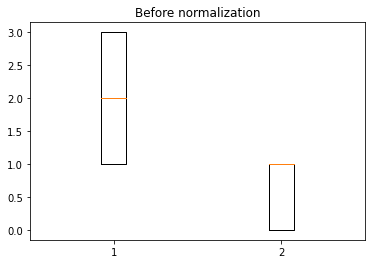

In [10]:
plt.title("Before normalization")
plt.boxplot([Titanic_Data.pclass, Titanic_Data.sex])

{'boxes': [<matplotlib.lines.Line2D at 0x7ff64e7b05d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff64e7b5610>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff64e7bc650>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ff64e7bc110>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7ff64e7b0b50>,
  <matplotlib.lines.Line2D at 0x7ff64e7c6610>]}

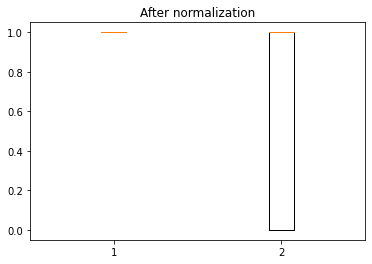

In [11]:
plt.title("After normalization")
pclassnormalized = np.asarray(Titanic_Data.pclass)
pclassnormalized = pclassnormalized.reshape(-2,1)
sexnormalized = np.asarray(Titanic_Data.sex)
sexnormalized = sexnormalized.reshape(-2,1)

pclassnormalized = preprocessing.normalize(pclassnormalized)
sexnormalized = preprocessing.normalize(sexnormalized)
Titanic_Data.pclass = pclassnormalized
Titanic_Data.sex = sexnormalized
plt.boxplot([Titanic_Data.pclass, Titanic_Data.sex])

=================== Корреляция ===================

In [14]:
from scipy import stats
Features = pd.DataFrame({
    "PClass": Titanic_Data.pclass,
    "Gender": Titanic_Data.sex
})

stats.pearsonr(Features.PClass, Features.Gender)

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


(nan, nan)

=================== Замена кат. признаков ===================

In [12]:
data_object = Titanic_Data.select_dtypes(include=[object])
data_int = Titanic_Data.select_dtypes(include=[np.number])
data_object_encoded = data_object.apply(le.fit_transform)
data_object_encoded.reset_index(drop=True, inplace=True)
data_int.reset_index(drop=True, inplace=True)
Titanic_Data2 = pd.concat([data_int, data_object_encoded], axis = 1)
Titanic_Data2

,pclass,survived,sex,age,sibsp,parch,body,name,ticket,fare,cabin,embarked,boat,home.dest
0,1.0,1,0.0,29.0000,0,0,9.0,21,186,68,43,2,10,305
1,1.0,1,1.0,0.9167,1,2,9.0,23,49,52,79,2,2,228
2,1.0,0,0.0,2.0000,1,2,9.0,24,49,52,79,2,12,228
3,1.0,0,1.0,30.0000,1,2,135.0,25,49,52,79,2,12,228
4,1.0,0,0.0,25.0000,1,2,9.0,26,49,52,79,2,12,228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,0,1.0,35.0000,0,0,9.0,756,386,198,80,0,12,234
996,1.0,0,1.0,33.0000,0,0,9.0,757,412,198,80,2,12,234
997,1.0,1,0.0,24.0000,0,0,9.0,760,235,175,80,0,23,234
998,1.0,0,1.0,24.0000,0,0,9.0,761,410,198,80,0,12,234


=================== Классификация ===================

In [15]:
y = Titanic_Data.survived
x = Features
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, shuffle=True)

In [16]:
RFC = RandomForestClassifier()

In [17]:
RNC = RadiusNeighborsClassifier()

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       289
           1       0.76      0.69      0.72       211

    accuracy                           0.78       500
   macro avg       0.77      0.76      0.77       500
weighted avg       0.77      0.78      0.77       500



Text(0.5, 1.0, 'Accuracy:0.776')

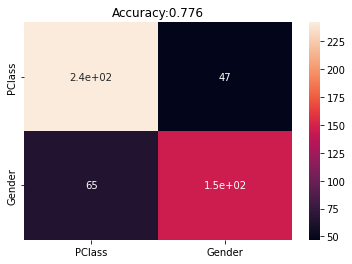

In [18]:
grid_params = {
    'criterion':['gini','entropy'],
    'max_depth': np.arange(2, 1000, 4)
}

RFC_thing = GridSearchCV(RandomForestClassifier(), grid_params, verbose=1, cv=5, n_jobs=-1)
RFC_thing_result = RFC_thing.fit(x_train, y_train)

y_pred_RFC_thing = RFC_thing_result.predict(x_test)

print(classification_report(y_test, y_pred_RFC_thing))

RFC_thing_2 = pd.DataFrame(confusion_matrix(y_test, y_pred_RFC_thing),
                        index = ['PClass', 'Gender'], 
                     columns = ['PClass','Gender'])
sns.heatmap(RFC_thing_2, annot=True)
plt.title('Accuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred_RFC_thing)))


Fitting 5 folds for each of 280 candidates, totalling 1400 fits
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       289
           1       0.76      0.69      0.72       211

    accuracy                           0.78       500
   macro avg       0.77      0.76      0.77       500
weighted avg       0.77      0.78      0.77       500



Text(0.5, 1.0, 'Accuracy:0.776')

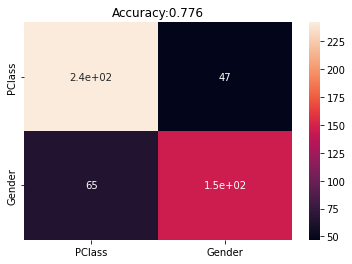

In [19]:
grid_params = {
    'radius' : (70),
    'weights' : ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan']
}

RNC_thing = GridSearchCV(RadiusNeighborsClassifier(), grid_params, verbose=1, cv=5, n_jobs=-1)
RNC_thing_result = RNC_thing.fit(x_train, y_train)

y_pred_RNC_thing = RNC_thing_result.predict(x_test)

print(classification_report(y_test, y_pred_RNC_thing))

RNC_thing_2 = pd.DataFrame(confusion_matrix(y_test, y_pred_RNC_thing),
                        index = ['PClass', 'Gender'], 
                     columns = ['PClass','Gender'])
sns.heatmap(RNC_thing_2, annot=True)
plt.title('Accuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred_RNC_thing)))

In [20]:
RFC_thing_3 = RandomForestClassifier(**RFC_thing_result.best_params_)
RNC_thing_3 = RadiusNeighborsClassifier(**RNC_thing_result.best_params_)

RFC_thing_3.fit(x_train, y_train)
RNC_thing_3.fit(x_train, y_train)

RFC_res = RFC_thing_3.predict_proba(x_test)
RNC_res = RNC_thing_3.predict_proba(x_test)


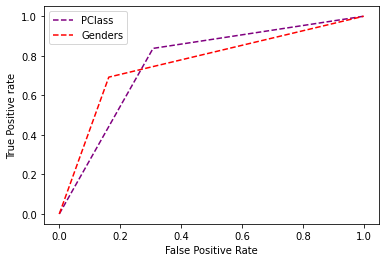

In [30]:
fpr = {}
tpr = {}


for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, RFC_res[:,i], pos_label=i)



plt.plot(fpr[0], tpr[0], linestyle='--',color='purple', label='PClass')
plt.plot(fpr[1], tpr[1], linestyle='--',color='red', label='Genders')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

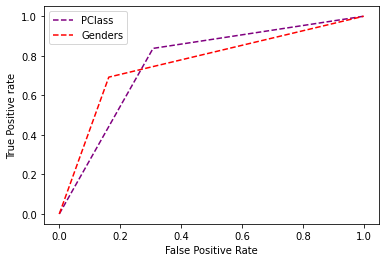

In [29]:
fpr = {}
tpr = {}


for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, RNC_res[:,i], pos_label=i)


plt.plot(fpr[0], tpr[0], linestyle='--',color='purple', label='PClass')
plt.plot(fpr[1], tpr[1], linestyle='--',color='red', label='Genders')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

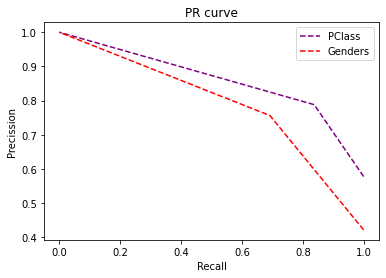

In [31]:
p = {}
r = {}

for i in range(2):
    p[i], r[i], _ = precision_recall_curve(y_test, RFC_res[:,i], pos_label=i)
    

plt.plot(r[0], p[0], linestyle='--',color='purple', label='PClass')
plt.plot(r[1], p[1], linestyle='--',color='red', label='Genders')


plt.title('PR curve')
plt.xlabel('Recall')
plt.ylabel('Precission')
plt.legend(loc='best')
plt.legend(loc='best')

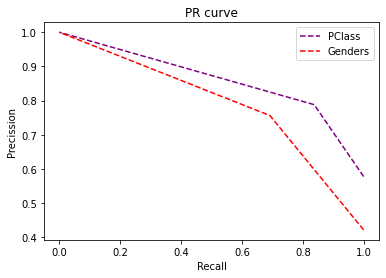

In [32]:
p = {}
r = {}

for i in range(2):
    p[i], r[i], _ = precision_recall_curve(y_test, RNC_res[:,i], pos_label=i)
    

plt.plot(r[0], p[0], linestyle='--',color='purple', label='PClass')
plt.plot(r[1], p[1], linestyle='--',color='red', label='Genders')


plt.title('PR curve')
plt.xlabel('Recall')
plt.ylabel('Precission')
plt.legend(loc='best')
plt.legend(loc='best')

In [33]:















all_fpr = np.unique(np.concatenate([fpr[i] for i in range(2)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(2):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= 3

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr

